## Importing Libraries

In [20]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Compress Class

In [21]:
class SVDImageCompressor:
    
    def __init__(self, img_path, compressed_path, out_path):
        self.img_path = img_path
        self.compressed_path = compressed_path
        self.out_path = out_path
    
    def findK(self, percentClarity, arr):
        k = 0
        s = 0
        arrSum = sum(arr)
        for i in arr:
            s += i
            p = (s/arrSum)*100
            k+=1
            if p >= percentClarity:
                break
        return k

    def compress_channel(self, img_array, channel, percentage):
        specific_channel = img_array[:,:,channel]
        U, S, Vt = np.linalg.svd(specific_channel)
        k = self.findK(percentage, S)
        reconstructed_channel = U[:,:k] @ np.diag(S[:k]) @ Vt[:k,:]
        return reconstructed_channel

    def store_compressed_data(self, quality):
        img = Image.open(self.img_path)
        img_array = np.array(img)
        l, w, h = img_array.shape
        newimg_array = np.zeros((l,w,h))
        for channel in range(h):
            newimg_array[:,:,channel] = self.compress_channel(img_array, channel, quality)
        np.save(self.compressed_path, newimg_array)
        return newimg_array

    def reconstruct_compressed_image(self):
        compressed_image = np.load(self.compressed_path)
        img = Image.fromarray(compressed_image.astype('uint8'))
        img.save(self.out_path)
        return img

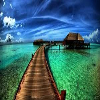

In [22]:
img_comp = SVDImageCompressor("./images/1.png", "./compressed_images/1.npy", "./compressed_images/1.png")
img_comp.store_compressed_data(quality=100)
final = img_comp.reconstruct_compressed_image()
final